# Exercise 10: Cut-based Analysis
## Goals
- Learn how to perform a simple cut-based analysis.  
- Understand how to separate **signal** and **background** using a threshold cut.  
- Define and compute a **Figure of Merit (FOM)** to quantify sensitivity.  
- Optimize the cut to maximize the sensitivity.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# --- 1. Load CSV and visualize ---
df = pd.read_csv("data/data_ex10.csv")
print("DataFrame head:")
print(df.head())

bins = 60
xmin, xmax = df["x"].min(), df["x"].max()
bin_edges = np.linspace(xmin, xmax, bins+1)

DataFrame head:
          x  label
0  1.407804      0
1  9.030364      0
2  3.950237      0
3  2.738828      0
4  0.508875      0


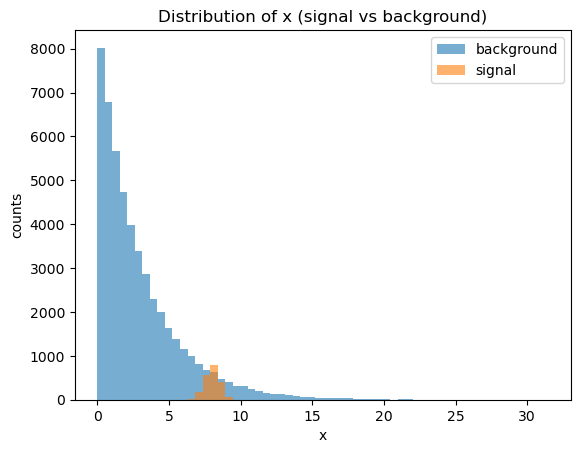

In [18]:
plt.figure()
plt.hist(df.loc[df.label==0, "x"], bins=bin_edges, alpha=0.6, label="background")
plt.hist(df.loc[df.label==1, "x"], bins=bin_edges, alpha=0.6, label="signal")
plt.xlabel("x")
plt.ylabel("counts")
plt.title("Distribution of x (signal vs background)")
plt.legend()
plt.show()

In [31]:
# --- 2. Define Figure Of Merit (FOM) and perform cut optimization ---
def compute_fom(df, thresh):
    s = df.loc[(df["label"] == 1) & (df["x"] > thresh)].shape[0]
    b = df.loc[(df["label"] == 0) & (df["x"] > thresh)].shape[0]
    if (s+b) > 0:
        fom = s/np.sqrt(s+b)
    else:
        fom = 0
    return fom, s, b

In [47]:
thresholds = np.linspace(df["x"].min(), df["x"].max(), 100)
foms = []
for t in thresholds:
    fom, s, b = compute_fom(df, t)
    foms.append({"thresh": t, "fom": fom, "s": s, "b": b})
    
results = pd.DataFrame(foms)
print(results.head())

best = results.loc[results["fom"].idxmax()]
print("\nBest cut:")
print(best)

     thresh        fom     s      b
0  0.000017   8.770665  2000  49999
1  0.317852   9.230125  2000  44951
2  0.635688   9.707251  2000  40449
3  0.953524  10.212592  2000  36352
4  1.271359  10.744616  2000  32648

Best cut:
thresh       6.992402
fom         23.804749
s         1964.000000
b         4843.000000
Name: 22, dtype: float64


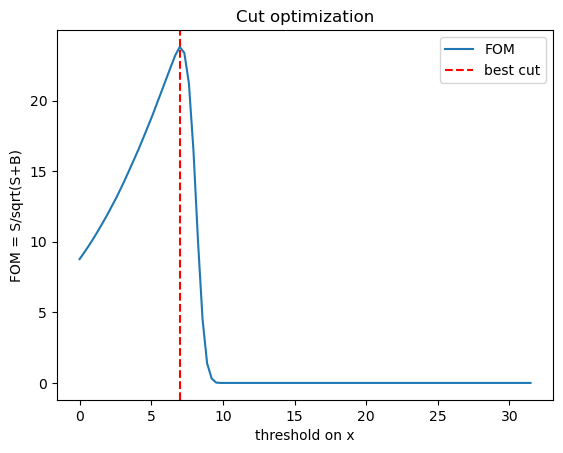

In [48]:
plt.figure()
plt.plot(results["thresh"], results["fom"], label="FOM")
plt.axvline(best["thresh"], linestyle="--", color="red", label="best cut")
plt.xlabel("threshold on x")
plt.ylabel("FOM = S/sqrt(S+B)")
plt.title("Cut optimization")
plt.legend()
plt.show()